In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
data_folder = "./images/"
image_folders = os.listdir(data_folder)
image_names = os.listdir(data_folder + image_folders[0])

number_of_images=0

for label in image_folders:
    number_of_images += len(os.listdir(data_folder + label))
    

In [3]:
im = Image.open(data_folder + image_folders[0] + '/' + image_names[0])
pix = np.array(im)

In [4]:
data=np.zeros((number_of_images,224,224,3))
labels=[]
i=0
for label in image_folders:
    im_in_label=os.listdir(data_folder + label)
    for image_name in im_in_label:
        im = Image.open(data_folder + label + '/' + image_name)
        new_img = im1=np.clip(np.array(im)+int(np.random.random()*100-50),0,255)#im#.crop((20,60,20+96,60+128))
        data[i,:,:,:] = np.array(new_img)
        data[i,130:224,:,:] = 0#np.array(new_img)
        data[i,:,130:224,:] = 0
        #plt.imshow(data[i,:,:,0])
        #plt.show()
        labels.append(label)
        i+=1

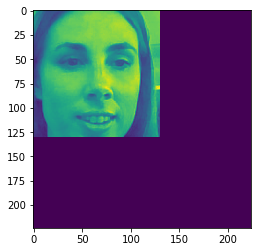

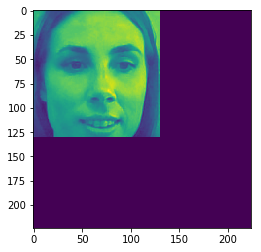

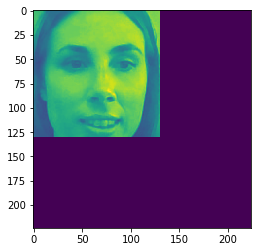

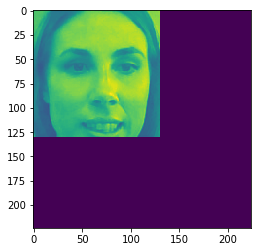

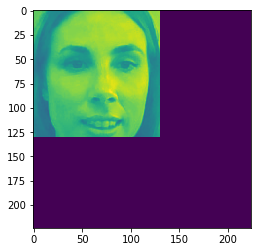

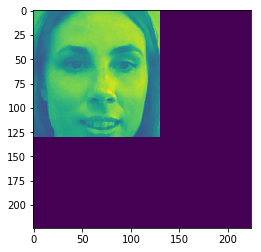

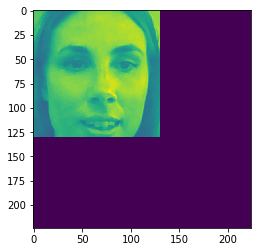

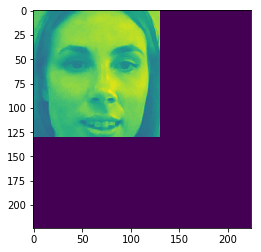

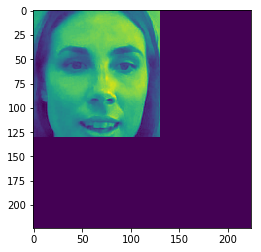

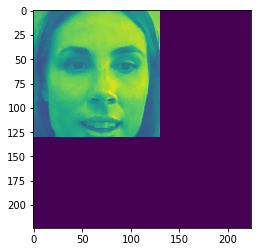

In [5]:
for i in range(10):
    plt.imshow(data[i,:,:,0])
    plt.show()

In [6]:
# Scale the dataset to have values between 0 and 1
if np.max(data)>1:
    data = data / 255.0

else:
    print('Already scaled once')

In [7]:
#Convert labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

list(le.classes_)

conv_labels=le.transform(labels) 

list(le.inverse_transform([1, 0, 1]))
print(le.classes_)

['carro' 'johan' 'saman' 'simon' 'simon_wo_glasses']


In [8]:
from sklearn.utils import shuffle
#reshaped_data = data.reshape(-1,224, 224, 3)   #Reshape for CNN -  should work!!
#data = data.reshape(-1,224, 224, 3)

conv_labels, data = shuffle(conv_labels, data)


[4 3 3 4 4 1 3 3 4 4 3 4 0 2 4 1 1 3 3 1 3 4 4 4 2 1 3 4 3 4 4 3 3 3 4 3 0
 4 4 3 3 4 4 3 1 4 3 3 4 4 4 2 4 4 0 3 2 3 4 4 2 4 4 3 1 3 1 4 0 1 4 0 3 3
 0 4 1 4 0 4 1 4 3 4 4 3 3 3 1 3 4 4 4 3 4 4 4 3 4 0 3 4 0 4 1 4 3 1 1 3 3
 4 4 1 3 4 0 4 4 4 1 4 0 1 0 3 2 1 3 4 0 4 0 4 4 0 4 4 0 2 0 3 3 4 4 0 3 3
 1 1 3 3 4 0 1 3 4 4 3 0 4 4 4 3 3 4 4 4 4 0 1 0 4 0 2 0 3 4 1 4 4 0 1 1 0
 4 3 3 3 4 2 4 0 3 4 3 4 3 0 1 2 4 3 4 4 4 3 4 4 0 4 4 3 4 3 0 1 4 3 4 0 3
 4 3 2 3 4 1 4 4 2 3 4 3 2 2 3 3 3 3 4 1 2 3 2 4 3 3 3 2 4 4 4 3 4 1 3 3 3
 3 1 3 3 4 4 2 3 4 4 4 1 4 3 3 4 4 4 3 3 3 4 1 4 1 1 3 0 3 3 0 3 2 4 4 4 0
 2 4 2 4 4 1 0 4 3 3 3 0 0 0 0 0 3 1 4 4 3 0 4 4 0 3 2 0 3 4 4 2 0 3 3 4 3
 3 3 4 3 4 1 3 3 2 3 4 4 4 4 2 0 4 1 4 4 3 4 3 4 1 0 3 4 1 0 4 3 4 0 1 0 4
 4 3 2 4 0 0 4 1 3 4 2 3 3 0 0 3 4 3 4 0 1 4 3 0 4 2 4 2 3 3 3 3 4 3 4 4 2
 3 3 3 2 1 3 1 3 0 4 4 3 1 4 4 4 4 1 3 3 3 4 1 4 4 1 4 4 3 3 3 4 4 0 4 2 4
 1 2 0 4 3 2 3 4 3 4 4 3 4 2 3 3 4 4 0 3 0 3 3 2 3 2 2 3 4 4 0 2 3 4 4 1 4
 4 4 3 3 2 3 0 3 2 4 4 4 

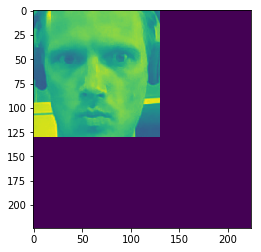

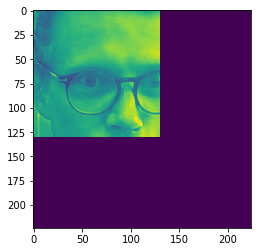

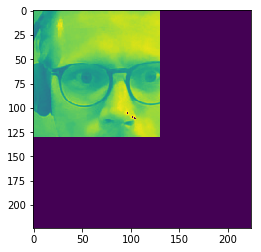

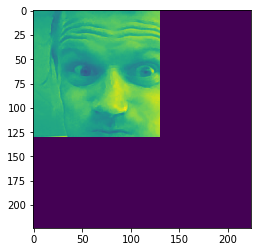

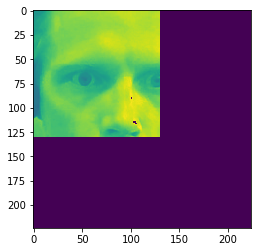

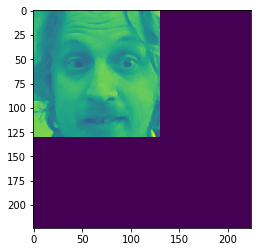

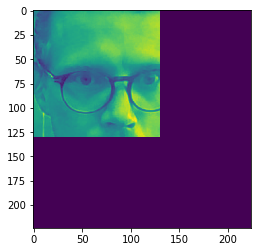

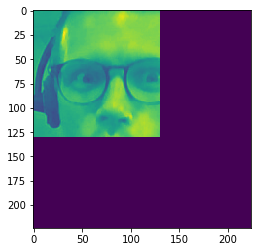

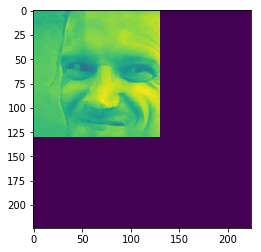

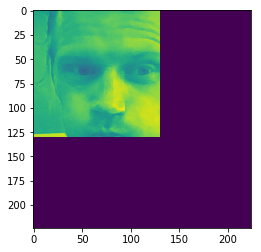

In [9]:
print(conv_labels)
for i in range(10):
    plt.imshow(data[i,:,:,0])
    plt.show()

In [17]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input,Flatten,Dropout,Dense
from tensorflow.keras.models import Model
vg16 = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = vg16.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(5, activation="softmax")(headModel)#
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=vg16.input, outputs=headModel)

#Lock the VGG model parameters
for layer in vg16.layers:
    layer.trainable = False

In [184]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

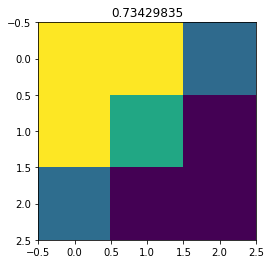

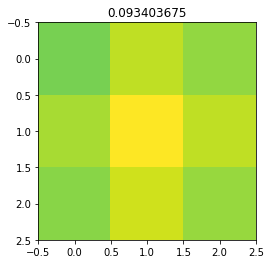

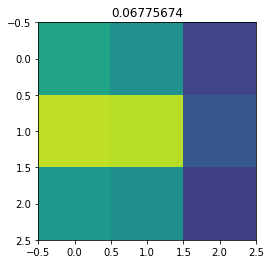

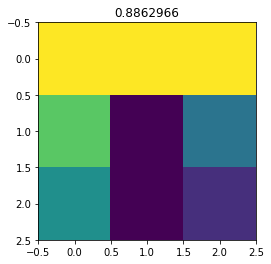

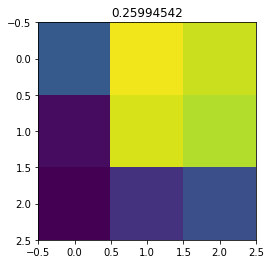

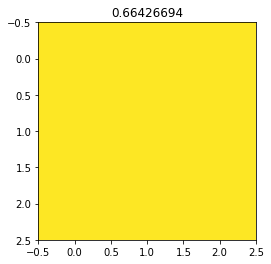

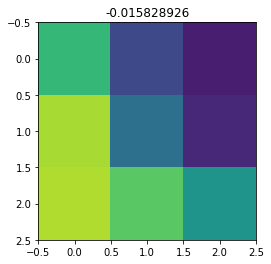

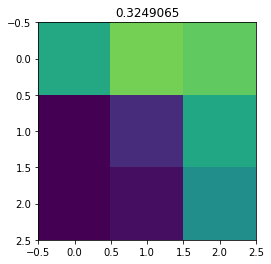

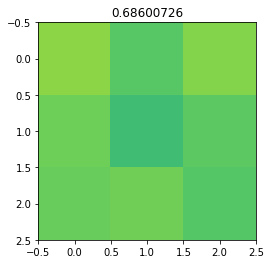

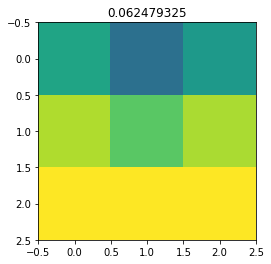

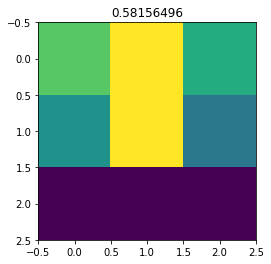

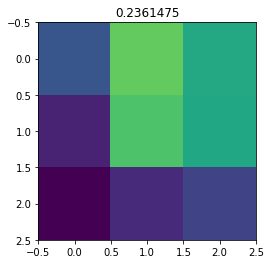

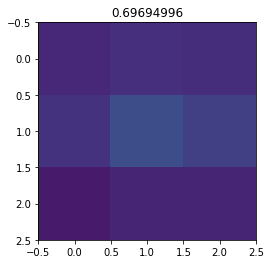

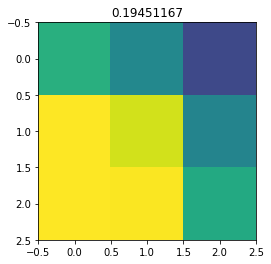

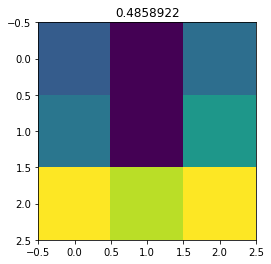

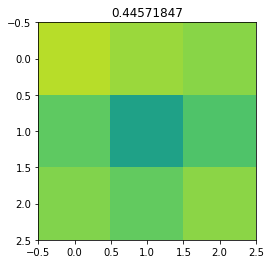

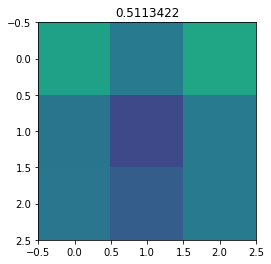

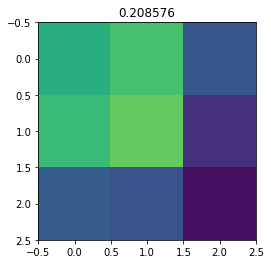

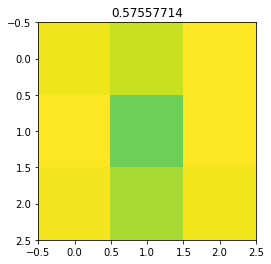

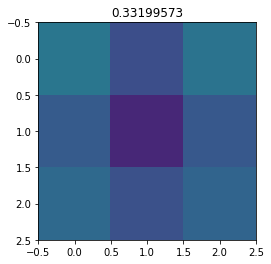

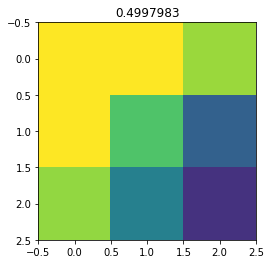

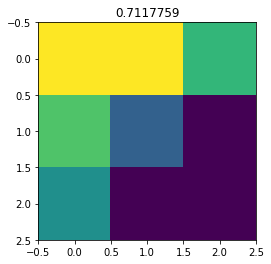

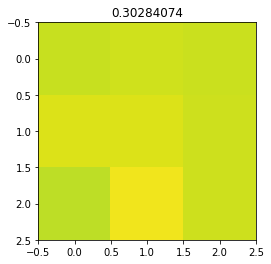

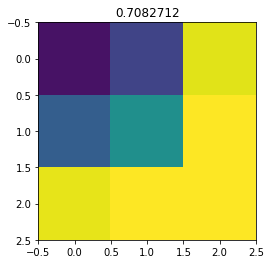

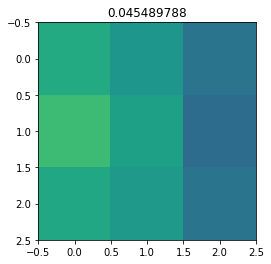

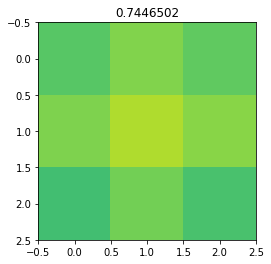

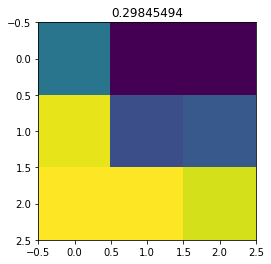

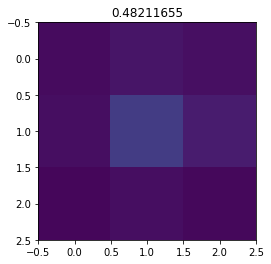

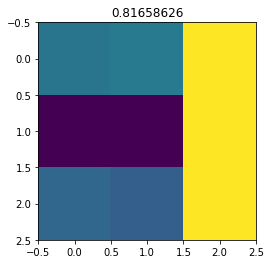

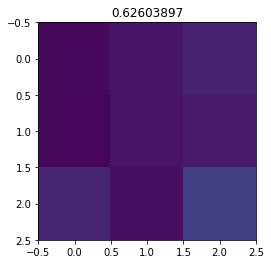

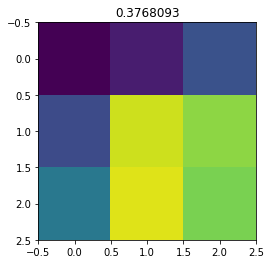

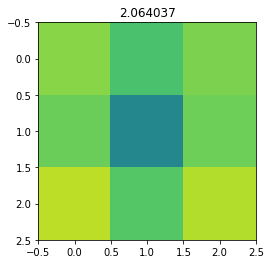

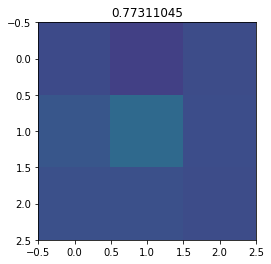

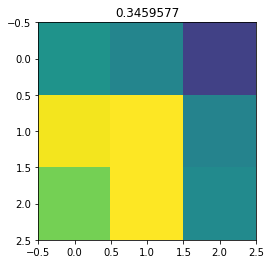

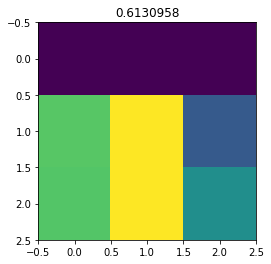

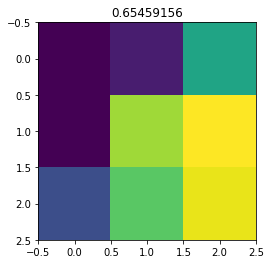

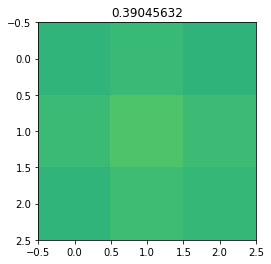

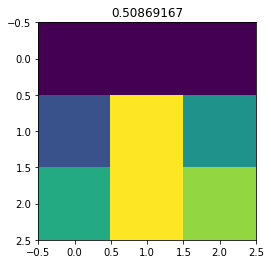

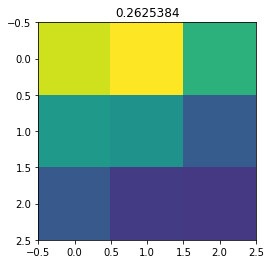

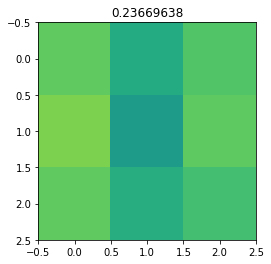

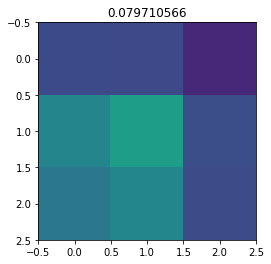

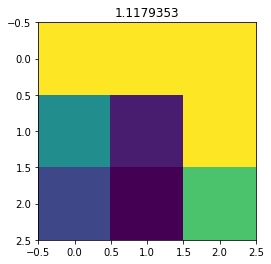

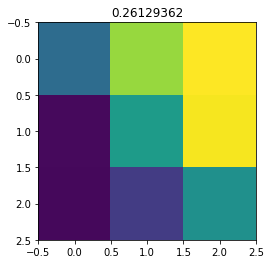

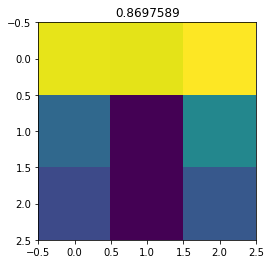

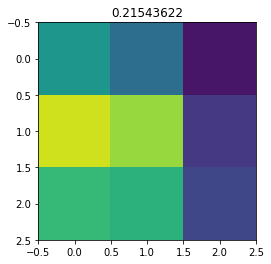

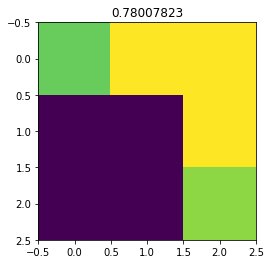

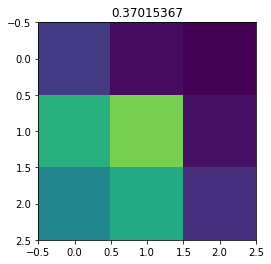

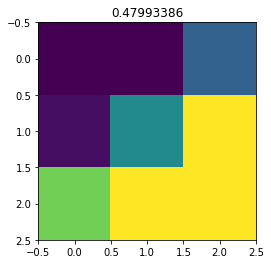

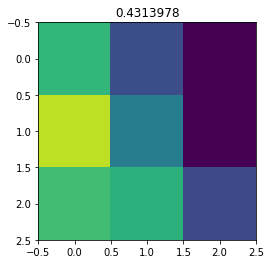

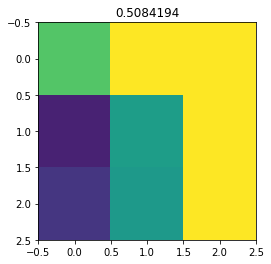

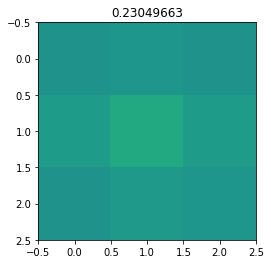

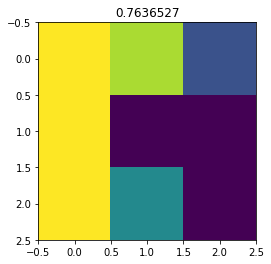

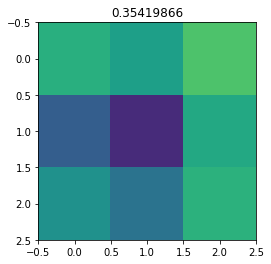

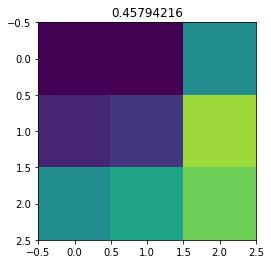

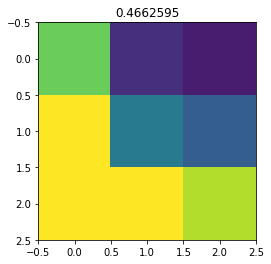

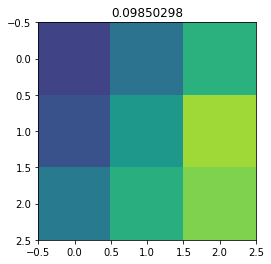

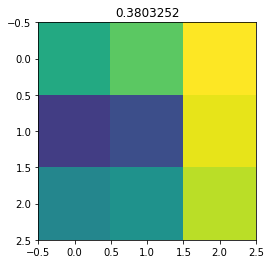

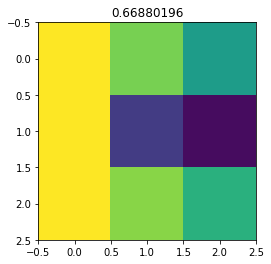

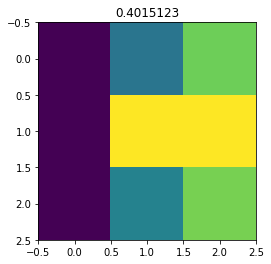

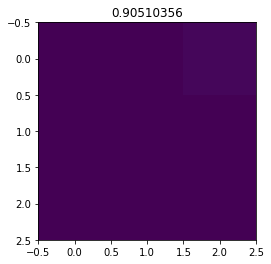

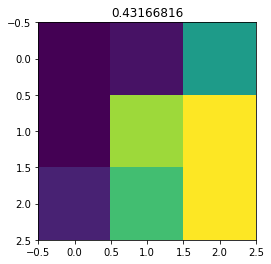

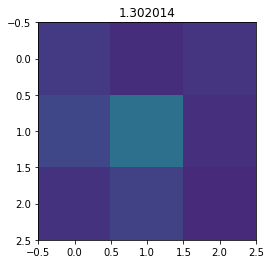

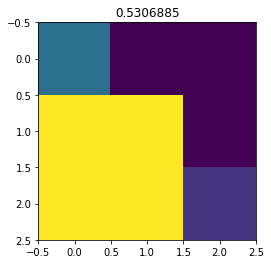

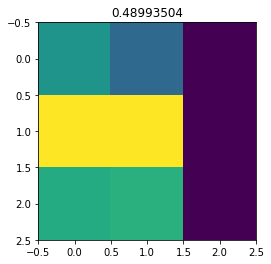

In [177]:
#model.summary()
a=model.layers[1]
#a.get_weights()[0][:,:,:,:]
for i in range(64):
    #b=model.get_weights()[0]
    #print(b)
    filter1=model.layers[1].get_weights()[0][:,:,0,i]
    wheight = model.layers[1].get_weights()[1][i]
    plt.imshow(filter1, vmin=-0.2, vmax=0.2)
    plt.title(wheight)
    plt.show()
    #filter0=model.layers[0].get_weights()[0][:,:,0,i]
    #plt.imshow(filter0,vmin=-0.2,vmax=0.2)
    #plt.show()
    

[3 4 3 3 3 4 3 4 4 0 4 4 3 3 3 0 4 4 1 4 0 4 4 3 2 3 0 3 0 1 4 0 0 2 1 2 1
 4 0 0 4 0 0 4 4 4 3 4 4 0 4 4 2 2 1 2 3 2 4 3 4 3 0 3 0 0 1 3 3 3 4 3 2 4
 4 1 3 3 4 3 4 1 3 3 4 4 4 3 3 1 4 4 4 4 4 2 1 3 2 3 4 3 4 4 1 4 4 4 1 3 1
 4 3 3 1 4 3 3 2 3 1 3 4 0 3 2 3 0 2 3 3 1 2 1 4 1 4 4 2 1 3 4 3 4 4 4 4 3
 3 4 4 3 1 4 3 4 4 4 4 3 0 1 3 4 0 4 0 1 3 3 1 3 0 4 0 2 4 0 4 4 3 4 1 2 4
 2 2 3 4 3 0 3 4 4 3 4 4 0 2 0 2 4 0 3 3 1 4 3 4 4 3 4 3 3 0 3 0 4 3 3 3 4
 1 3 4 3 4 3 4 0 4 0 2 1 4 1 4 4 3 1 3 0 4 3 3 0 4 3 4 1 4 3 3 3 0 3 3 4 4
 4 2 3 3 4 3 3 4 4 1 4 4 0 1 4 4 3 3 3 3 2 4 3 4 3 4 4 3 0 4 3 4 2 0 0 3 4
 4 3 3 0 4 3 3 4 4 1 3 3 2 0 1 4 1 3 4 3 0 3 4 3 4 4 3 4 3 2 4 4 3 0 4 4 3
 4 4 0 4 3 0 0 3 1 3 4 1 4 3 3 4 0 0 3 4 3 4 2 4 4 2 1 3 3 0 0 3 2 4 0 4 4
 3 1 3 1 1 4 1 0 4 4 3 3 2 2 4 4 4 3 1 3 3 1 0 4 4 3 3 4 3 3 4 3 4 0 4 0 3
 0 3 0 4 3 1 4 2 2 4 4 4 2 0 3 3 3 3 2 3 2 0 4 1 4 2 3 0 3 4 4 4 4 4 4 4 4
 3 1 3 3 0 3 0 4 3 3 3 4 1 4 4 2 3 0 1 4 2 4 1 3 1 4 4 3 4 4 0 3 4 4 4 2 3
 3 4 1 4 4 3 3 3 3 2 4 2 

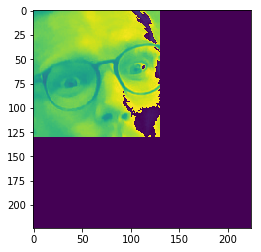

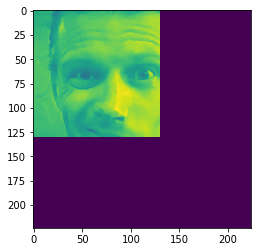

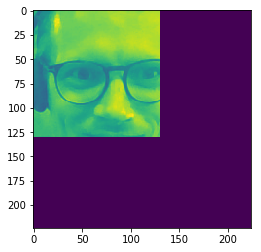

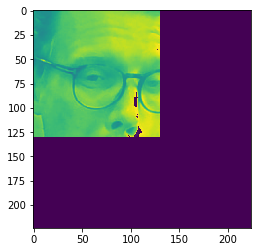

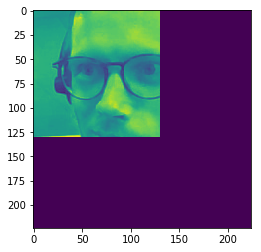

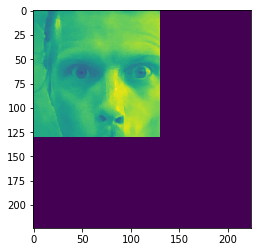

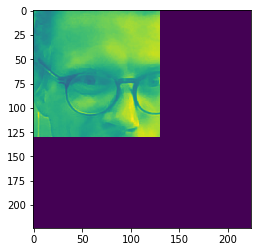

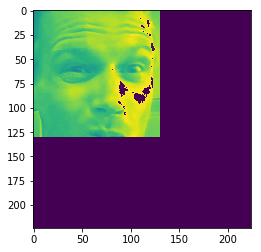

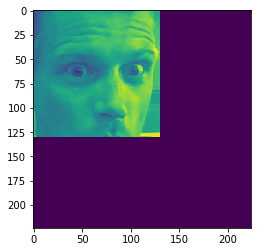

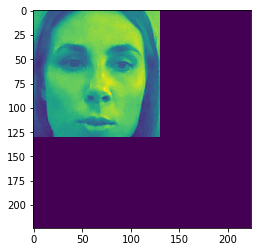

In [141]:
print(conv_labels)
for i in range(10):
    plt.imshow(data[i,:,:,0])
    plt.show()

In [142]:
from tensorflow.keras.optimizers import SGD
print("[INFO] compiling model...")
#opt = SGD(lr=1e-4, momentum=0.9)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

[INFO] compiling model...


In [143]:
history=model.fit(data[0:300], conv_labels[0:300], epochs=3, batch_size=15)

Epoch 1/3
300/300 [==============================] - 39s 129ms/sample - loss: 2.1276 - accuracy: 0.4900
Epoch 2/3
300/300 [==============================] - 38s 128ms/sample - loss: 0.4580 - accuracy: 0.8400
Epoch 3/3
300/300 [==============================] - 39s 129ms/sample - loss: 0.2359 - accuracy: 0.9200


In [144]:
pred=model.predict(data[300:400])

In [146]:
pred_lab=np.argmax(pred,axis=1)
le.inverse_transform(pred_lab)==le.inverse_transform(conv_labels[100:200])


array([ True,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False])

corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
not_corr


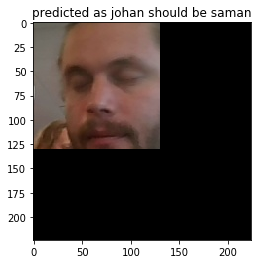

corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr
corr


In [147]:
for i in range(100):
    if pred_lab[i]==conv_labels[i+300]:
        print('corr')
    else:
        print('not_corr')
        plt.imshow(data[i+300])
        plt.title('predicted as ' +le.inverse_transform([pred_lab[i]])[0]+' should be '+ le.inverse_transform([conv_labels[i+300]])[0] )
        plt.show()

In [187]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model

vgg_model = VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(160, 160, 3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
#from tensokeras.models import Model
custom_model = Model(inputs=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

TypeError: _init_subclassed_network() got an unexpected keyword argument 'inputs'